In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from fkan.tensorflow import FractionalJacobiNeuralBlock as fJNB
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import *

tf.random.set_seed(0)
np.random.seed(0)

2024-06-12 01:01:37.550375: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


data shape: (50, 1) (50,)


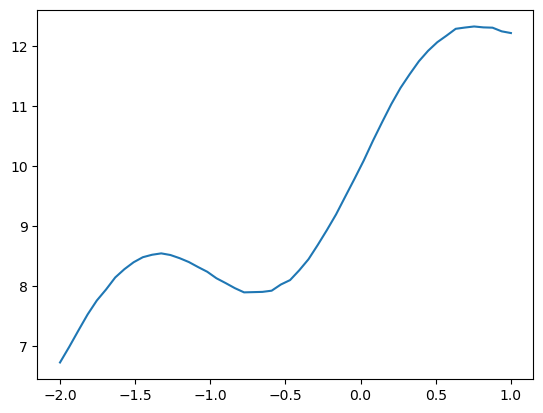

In [2]:
def f(x):
    return np.sin(x * np.pi) + 10 * np.exp(x / 5) + np.random.randn(len(x)) * 0.01


a, b = -2, 1

t = np.linspace(a, b, 50)
y = f(t)

X = t.reshape(-1, 1)

print("data shape:", X.shape, y.shape)
plt.plot(t, y)

In [3]:
# splitting the dataset into train and test parts

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=0
)
X_train.shape, y_test.shape

((33, 1), (17,))

In [4]:
batch_size = 512
epochs = 10
q = 2  # See paper for the definition and role of q
trial = 1
n_layers = 3

If using a predefined Keras activation function, replace each `fJNB(q)` with: `layers.Activation(activation)`

In [5]:
model = Sequential()
model.add(InputLayer(input_shape=(1,)))
for _ in range(n_layers):
    model.add(Dense(5))
    model.add(fJNB(q))

model.add(Dense(1))

opt = optimizers.Adam(learning_rate=0.01)
loss = tf.keras.losses.MeanSquaredError(name="loss")

model.compile(optimizer=opt, loss=loss, metrics=["mae"])

early_stopping = EarlyStopping(
    monitor="val_loss", patience=50, restore_best_weights=True
)

params = dict(
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    callbacks=[early_stopping],
)

history = model.fit(X_train, y_train, **params)

p = model.predict(X_test, verbose=0).flatten()
mae_test = tf.keras.losses.mean_absolute_error(y_test, p).numpy()

p = model.predict(X_train, verbose=0).flatten()
mae_train = tf.keras.losses.mean_absolute_error(y_train, p).numpy()
FILENAME = "data/multi-layer/JNB%s-%d.txt" % (q, trial)


def myprint(s):
    with open(FILENAME, "a") as f:
        print(s, file=f)


print("\nACC: %.2e %.2e" % (mae_train, mae_test), file=open(FILENAME, "a"))
model.summary(print_fn=myprint)
print(n_layers, file=open(FILENAME, "a"))

2024-06-12 01:01:39.889417: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 88.9392 - mae: 9.0249 - val_loss: 112.7018 - val_mae: 10.0669
Epoch 2/10
1/1 [==============================] - 0s 49ms/step - loss: 84.6868 - mae: 8.8194 - val_loss: 106.6550 - val_mae: 9.8016
Epoch 3/10
1/1 [==============================] - 0s 38ms/step - loss: 80.7069 - mae: 8.6214 - val_loss: 100.9025 - val_mae: 9.5431
Epoch 4/10
1/1 [==============================] - 0s 34ms/step - loss: 76.9377 - mae: 8.4299 - val_loss: 95.3748 - val_mae: 9.2898
Epoch 5/10
1/1 [==============================] - 0s 52ms/step - loss: 73.3387 - mae: 8.2438 - val_loss: 90.0768 - val_mae: 9.0415
Epoch 6/10
1/1 [==============================] - 0s 69ms/step - loss: 69.8846 - mae: 8.0615 - val_loss: 85.0322 - val_mae: 8.7993
Epoch 7/10
1/1 [==============================] - 0s 51ms/step - loss: 66.5660 - mae: 7.8818 - val_loss: 80.2728 - val_mae: 8.5649
Epoch 8/10
1/1 [==============================] - 0s 49ms/step - loss: 63.3903 - 

In [6]:
neuron = 3
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(neuron))
# model.add(Activation('relu'))
model.add(fJNB(q))

model.add(Dense(1))

opt = optimizers.Adam(learning_rate=0.01)
loss = tf.keras.losses.MeanSquaredError(name="loss")

model.compile(optimizer=opt, loss=loss, metrics=["mae"])

early_stopping = EarlyStopping(
    monitor="val_loss", patience=50, restore_best_weights=True
)

params = dict(
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
    validation_split=0.2,
    callbacks=[early_stopping],
)

history = model.fit(X_train, y_train, **params)

p = model.predict(X_test, verbose=0).flatten()
mae_test = tf.keras.losses.mean_absolute_error(y_test, p).numpy()

p = model.predict(X_train, verbose=0).flatten()
mae_train = tf.keras.losses.mean_absolute_error(y_train, p).numpy()
FILENAME = "data/single-layer/JNB%s-%d.txt" % (q, trial)

def myprint(s):
    with open(FILENAME, "a") as f:
        print(s, file=f)

print("\nACC: %.2e %.2e" % (mae_train, mae_test), file=open(FILENAME, "a"))
model.summary(print_fn=myprint)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 91.1983 - mae: 9.4117 - val_loss: 103.0714 - val_mae: 9.8923
Epoch 2/10
1/1 [==============================] - 0s 29ms/step - loss: 89.7677 - mae: 9.3310 - val_loss: 101.8273 - val_mae: 9.8217
Epoch 3/10
1/1 [==============================] - 0s 37ms/step - loss: 88.3336 - mae: 9.2492 - val_loss: 100.5858 - val_mae: 9.7505
Epoch 4/10
1/1 [==============================] - 0s 29ms/step - loss: 86.8969 - mae: 9.1665 - val_loss: 99.3463 - val_mae: 9.6787
Epoch 5/10
1/1 [==============================] - 0s 29ms/step - loss: 85.4582 - mae: 9.0827 - val_loss: 98.1081 - val_mae: 9.6064
Epoch 6/10
1/1 [==============================] - 0s 29ms/step - loss: 84.0179 - mae: 8.9980 - val_loss: 96.8693 - val_mae: 9.5333
Epoch 7/10
1/1 [==============================] - 0s 48ms/step - loss: 82.5761 - mae: 8.9123 - val_loss: 95.6272 - val_mae: 9.4595
Epoch 8/10
1/1 [==============================] - 0s 49ms/step - loss: 81.1327 - m